# OLD - archived - not guaranteed to work anymore

Remark: This notebook is for testing and integrating code changes by Christian from 181214.

In [1]:
# IMPORTANT: we need to import stuff from masci-tools folder.
# Since masci-tools is not installed as a module (yet), the notebook kernel
# needs to be started in the masci-tools folder.
# If that has not happened for some reason, then need to add the masci-tools
# manually to the sys path.
import os
import sys

cwd = os.getcwd()
path_mtools = cwd
dirname_mtools = "masci-tools"
# first try if we can get away without needing an absolute path
if dirname_mtools in path_mtools:
    while os.path.basename(path_mtools) != dirname_mtools:
        path_mtools = os.path.split(path_mtools)[0]
else:
    # okay, try with an absolute path
    path_mtools = "/home/johannes/Desktop/Studium/Kurse_RWTH/SiScLab/18W/repos/masci-tools"
    if not os.path.isdir(path_mtools):
        raise IOError(f"Could not find path to masci-tools. Please specify absolute path.")

# found masci-tools. add to syspath (for imports) and chdir.
if path_mtools not in sys.path:
    # add only once
    sys.path.append(path_mtools)

# CURRENT Imports v01
from banddos.ipynb

May be changed below.

In [2]:
# Jupyter, Python imports
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
# from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

#  python 3interactive figures in a live IPython notebook session
# if run from jupyter-notebook:
# %matplotlib nbagg
# if run from jupyter-lab
%matplotlib widget

# studentproject18ws imports
import os
import logging
from studenproject18ws.hdf.reader import Reader
from studenproject18ws.hdf.recipes import Recipes


# CURRENT File selection & read v01 - hard-coded
from banddos.ipynb

In [3]:
filename = 'banddos_4x4.hdf'
# filename = 'banddos.hdf'
# filename = 'banddos_Co.hdf'

filepath = ['..', '..', '..', 'data', 'input', filename]
filepath = os.path.join(*filepath)

data = None
extractor = Reader(filepath=filepath)
with extractor as h5file:
    data = extractor.read(recipe=Recipes.Bands)
    #
    # Note:
    # Inside the with statement (context manager),
    # all data attributes that are type h5py Dataset are available (in-file access)
    # When the statement is left,the HDF5 file gets closed and the datasets are closed.
    #
    # Use data outside the with-statement (in-memory access: all HDF5 datasets converted to numpy ndarrays):
    data.move_datasets_to_memory()
    


In [5]:
# data (currently) has a function that returns a plt configured to .show() bandstrure plt.
# we want to reuse that code here now. So do a little magic: retrieve the function definiton

def retrieve_function_def(function):
    """Returns the function definition of a func in memory and pastes into new notebook cell.
    """
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
    
retrieve_function_def(data.simulate_plot)

In [10]:
    def simulate_plot(self, mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent, ax, color,
                      alpha=1):
        """Plot regular.

        Static plot method as template for interactive plot function in GUI.

        christian's code version 181214

        :param mask_bands:
        :param mask_characters:
        :param mask_groups:
        :param spin:
        :param unfolding_weight_exponent:
        :param ax:
        :param color:
        :param alpha:
        :return:
        """
        (k_r, E_r, W_r) = self.reshape_data(mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent)
        # just plot points with minimal size of t
        speed_up = True
        if (speed_up == True):
            t = 1e-4
            k_r = k_r[W_r > t]
            E_r = E_r[W_r > t]
            W_r = W_r[W_r > t]
        ax.scatter(k_r, (E_r - self.fermi_energy) * self.HARTREE_EV,
                   marker='o', c=color, s=5 * W_r, lw=0, alpha=alpha)


# CURRENT Plot v01 - integrate code changes by Christian 181214 Fri
adapted from banddos02.ipynb Plot v01.

**TODO: adapt to new methods from 181214.**

uses Import v01, File read v01.


In [13]:
# # okay, copied the relevant code from data.new_plotfunction_weights:
# # defining the plt outside of the function so we can link it with widgets.

# fig, ax = plt.subplots(1, figsize=(10,6))
# plt.suptitle(f"BandStructure of {filename}")

# # define widgets function


# # bands = atom_group_keys = e.g. for banddos.hdf: dict_keys[(1,2,3,4,5)]
# #                           Hm... should better convert to tuple back in reader?
# def_groups = data.atom_group_keys
# select_groups = widgets.SelectMultiple(options=def_groups, 
#                                    value=tuple(def_groups),
#                                   description='Atom Groups',
#                                   disabled=False)


# def_characters = ['s', 'p', 'd', 'f']
# # Characters = namedtuple('Characters', ['s', 'p', 'd', 'f'])
# # characters = Characters(0,1,2,3)
# select_characters = widgets.SelectMultiple(options=def_characters,
#                                           value=tuple(def_characters),
#                                           description='Band Character',
#                                           disabled=False)

# # number of bands can be large, so use a rangeslider instead of selectionslider
# def_bands = [band for band in range(data.eigenvalues.shape[2])]
# select_bands = widgets.IntRangeSlider(value=[def_bands[0]+1,def_bands[-1]+1], 
#                                       min=def_bands[0]+1, max=def_bands[-1]+1, step=1,
#                                      description='Bands',
#                                      disabled=False, continuous_update=False,
#                                      orientation='horizontal', readout=True,
#                                      readout_format='d')

# # the banddos y scale changes on change in band selection.
# # can disable that by storing ymin, ymax at startup (all bands selected).
# #   - Apparently this does not work by setting inside the update_plot for-loop with an if-condition
# #     to find ymin and ymax defined outside the function. No idea why. Perhaps try again, did sth wrong.
# # Okay, for now try another solution: here outside the plot, do the for-loop separately and define
# # ymin, ymax this way.
# ymin, ymax = (0,0)
# for n in def_bands:
#     y = data.E_i(n, spin=0)
#     ymin = min(ymin, np.min(y))
#     ymax = max(ymax, np.max(y))

# # okay, now need a checkbox to turn on/off y rescaling for the update_plot()
# select_rescale_ylim = widgets.Checkbox(value=False,
#                                    description='Fit y-axis',
#                                    disabled=False)

# @interact(bands=select_bands, characters=select_characters, groups=select_groups, fix_ylim=select_rescale_ylim)
# def update_plot(bands, characters, groups, fix_ylim):
    
#     ax.clear()
    
#     # convert arguments to the expected format for code 181124
#     bands_conved = range(bands[0]-1,bands[1])
#     groups_conved = [el-1 for el in groups]
#     characters_conved = [def_characters.index(el) for el in characters]
    
#     # convert arguments to the expected format for code 181212
#     mask_characters = [el in characters for el in def_characters]
#     mask_bands = [el in bands_conved for el in def_bands]
#     mask_groups = [el in [el for el in groups] for el in def_groups]
    
    
#     # plot for code 181212
#     spin = 0
#     (k_r, E_r, W_r) = data.reshape_data(mask_bands, mask_characters, mask_groups, spin,
#                                        unfolding_weight_exponent=1)
    
#     #just plot points with minimal size of t
#     speed_up = True
#     if(speed_up == True):
#         t = 1e-4
#         k_r = k_r[W_r>t]
#         E_r = E_r[W_r>t]
#         W_r = W_r[W_r>t]
    
#     ax.scatter(k_r, E_r, marker='o', c='b', s = 2 * W_r, lw=0)
#     plt.xlim(0, max(data.k_distances))
#     if not fix_ylim:
#         plt.ylim(ymin=ymin,ymax=ymax)
    
#     label = []
#     for i in range(len(data.k_special_point_labels)):
#         label += str(data.k_special_point_labels[i])[2]
#     plt.xticks(data.k_special_points, label)
#     plt.xlabel("k")
#     plt.ylabel("E(k)")
    
#     plt.show()
    
    

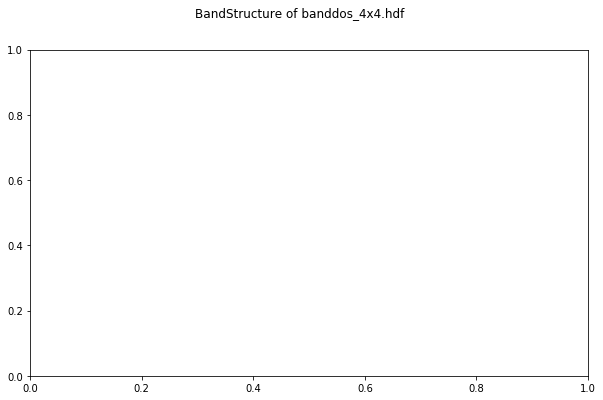

interactive(children=(IntRangeSlider(value=(1, 387), continuous_update=False, description='Bands', max=387, mi…

In [6]:
# defining the plt outside of the function so we can link it with widgets.

fig, ax = plt.subplots(1, figsize=(10,6))
plt.suptitle(f"BandStructure of {filename}")


def plot_two_characters(mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent, alpha=1):
    
    characters = np.array(range(4))[mask_characters]
    
    (k_resh, evs_resh, weight_resh) = data \
        .reshape_data(mask_bands, data._mask_characters([characters[0]]),
                      mask_groups, spin, unfolding_weight_exponent)

    (k_resh2, evs_resh2, weight_resh2) = data \
        .reshape_data(mask_bands, data._mask_characters([characters[1]]),
                      mask_groups, spin, unfolding_weight_exponent)
    
    rel = weight_resh / (weight_resh + weight_resh2) * 20
    cm = plt.cm.winter  # get_cmap('RdYlBu')
    ax.scatter(k_resh2, (evs_resh - data.fermi_energy) * data.HARTREE_EV, marker='o', c=rel, s=5 * weight_resh2,
               lw=0,
               alpha=alpha, cmap=cm)    


def plot(mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent, isCharacterPlot=False, alpha=1):
    
    if isCharacterPlot:
        alpha=1
        plot_two_characters(mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent, alpha)
    
    else:
        
        alpha = 1
        color = "blue"
        (k_r, E_r, W_r) = data.reshape_data(mask_bands, mask_characters, mask_groups, spin,
                                               unfolding_weight_exponent)
        # just plot points with minimal size of t
        speed_up = True
        if (speed_up == True):
            t = 1e-4
            k_r = k_r[W_r > t]
            E_r = E_r[W_r > t]
            W_r = W_r[W_r > t]
        ax.scatter(k_r, (E_r - data.fermi_energy) * data.HARTREE_EV,
                   marker='o', c=color, s=5 * W_r, lw=0, alpha=alpha)

        
#         # OLD: misunderstanding between CP and JW: multiple plots not needed
#         colors_chars = {
#             "red" : [True,False,False,False],
#             "blue" : [False,True,False,False],
#             "green" : [False,False,True,False],
#             "yellow" : [False,False,False,True]
#         }
#         alpha = 0.5                
#         for color, mask_char in colors_chars.items():

#             (k_r, E_r, W_r) = data.reshape_data(mask_bands, mask_char, mask_groups, spin,
#                                                unfolding_weight_exponent)

#             # just plot points with minimal size of t
#             speed_up = True
#             if (speed_up == True):
#                 t = 1e-4
#                 k_r = k_r[W_r > t]
#                 E_r = E_r[W_r > t]
#                 W_r = W_r[W_r > t]
#             ax.scatter(k_r, (E_r - data.fermi_energy) * data.HARTREE_EV,
#                        marker='o', c=color, s=5 * W_r, lw=0, alpha=alpha)
    

    

def plot_setup():
    label = []
    for i in range(len(data.k_special_point_labels)):
        label += str(data.k_special_point_labels[i])[2]

    plt.xticks(data.k_special_points, label)
    plt.ylabel("E(k) [eV]")
    plt.xlim(0, max(data.k_distances))
    plt.hlines(0, 0, max(data.k_distances), lw=0.1)    





# bands = atom_group_keys = e.g. for banddos.hdf: dict_keys[(1,2,3,4,5)]
#                           Hm... should better convert to tuple back in reader?
def_groups = data.atom_group_keys
select_groups = widgets.SelectMultiple(options=def_groups, 
                                   value=tuple(def_groups),
                                  description='Atom Groups',
                                  disabled=False)


def_characters = ['s', 'p', 'd', 'f']
# Characters = namedtuple('Characters', ['s', 'p', 'd', 'f'])
# characters = Characters(0,1,2,3)
select_characters = widgets.SelectMultiple(options=def_characters,
                                          value=tuple(def_characters),
                                          description='Band Character',
                                          disabled=False)

# number of bands can be large, so use a rangeslider instead of selectionslider
def_bands = [band for band in range(data.eigenvalues.shape[2])]
select_bands = widgets.IntRangeSlider(value=[def_bands[0]+1,def_bands[-1]+1], 
                                      min=def_bands[0]+1, max=def_bands[-1]+1, step=1,
                                     description='Bands',
                                     disabled=False, continuous_update=False,
                                     orientation='horizontal', readout=True,
                                     readout_format='d')

select_exponent = widgets.FloatSlider(
    value=1.0,
    min=0,
    max=1.0,
    step=0.01,
    description='Unfolding weight exponent:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
    

# @interact(bands=select_bands, groups=select_groups)
# def update_plot(bands, groups):
#     ax.clear()
    
#     # convert arguments to the expected format for code 181124
#     bands_conved = range(bands[0]-1,bands[1])
#     groups_conved = [el-1 for el in groups]
#     # characters_conved = [def_characters.index(el) for el in characters]
    
#     # convert arguments to the expected format for code 181212
#     # mask_characters = [el in characters for el in def_characters]
#     mask_bands = [el in bands_conved for el in def_bands]
#     mask_groups = [el in [el for el in groups] for el in def_groups]
    
#     spin = 0
#     alpha = 0.5
    
#     plot_setup()

 
@interact(bands=select_bands, characters=select_characters, groups=select_groups, unfolding_weight_exponent=select_exponent)
def update_plot(bands, characters, groups, unfolding_weight_exponent):
    ax.clear()
    
    # convert arguments to the expected format for code 181124
    bands_conved = range(bands[0]-1,bands[1])
    groups_conved = [el-1 for el in groups]
    characters_conved = [def_characters.index(el) for el in characters]
    # TODO: switch plotMethod on condition which/how many characters have been selected
    isCharacterPlot=False
    
    # convert arguments to the expected format for code 181212
    mask_characters = [el in characters for el in def_characters]
    mask_bands = [el in bands_conved for el in def_bands]
    mask_groups = [el in [el for el in groups] for el in def_groups]
    
    spin = 0
    
    plot_setup()
    plot(mask_bands, mask_characters, mask_groups, spin, unfolding_weight_exponent, isCharacterPlot)